In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

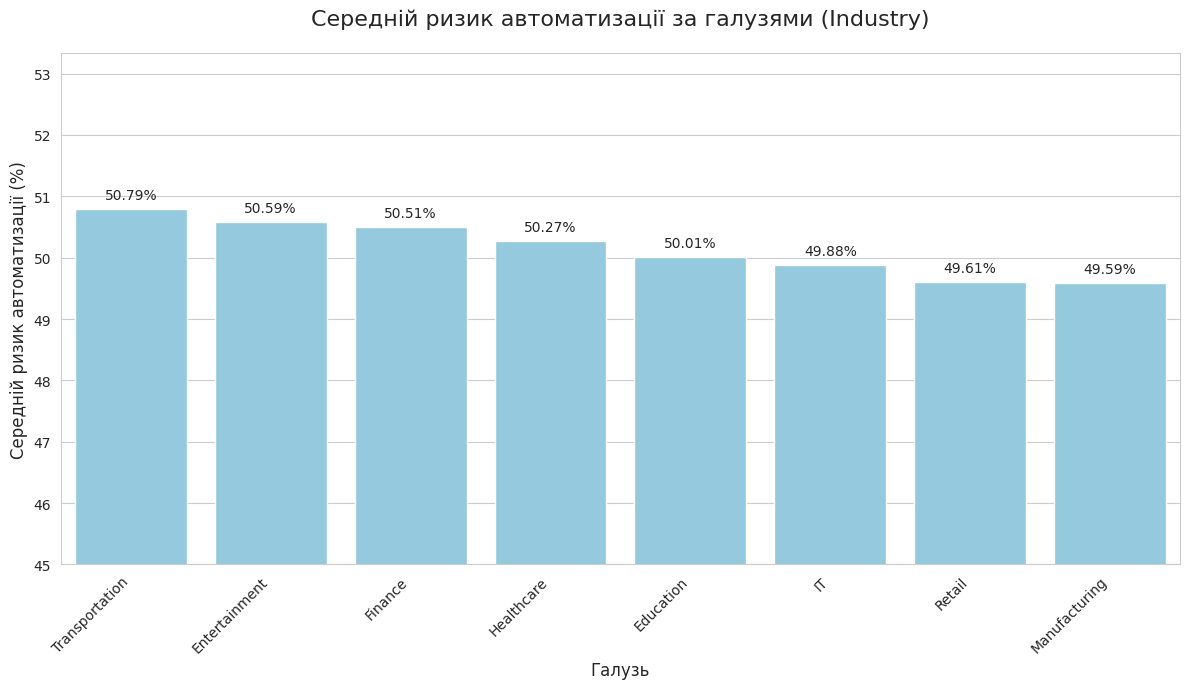

In [5]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

df_trends = pd.read_csv("ai_job_trends_dataset.csv")


if df_trends['Automation Risk (%)'].dtype == object:
    df_trends['Automation Risk (%)'] = (
        df_trends['Automation Risk (%)']
        .astype(str)
        .str.replace('%', '')
        .astype(float)
    )

industry_risk = df_trends.groupby('Industry')['Automation Risk (%)'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Industry',
    y='Automation Risk (%)',
    data=industry_risk,
    color='skyblue'
)

plt.title('Середній ризик автоматизації за галузями (Industry)', fontsize=16, pad=20)
plt.xlabel('Галузь', fontsize=12)
plt.ylabel('Середній ризик автоматизації (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.ylim(45, industry_risk['Automation Risk (%)'].max() * 1.05)
plt.tight_layout()
plt.show()


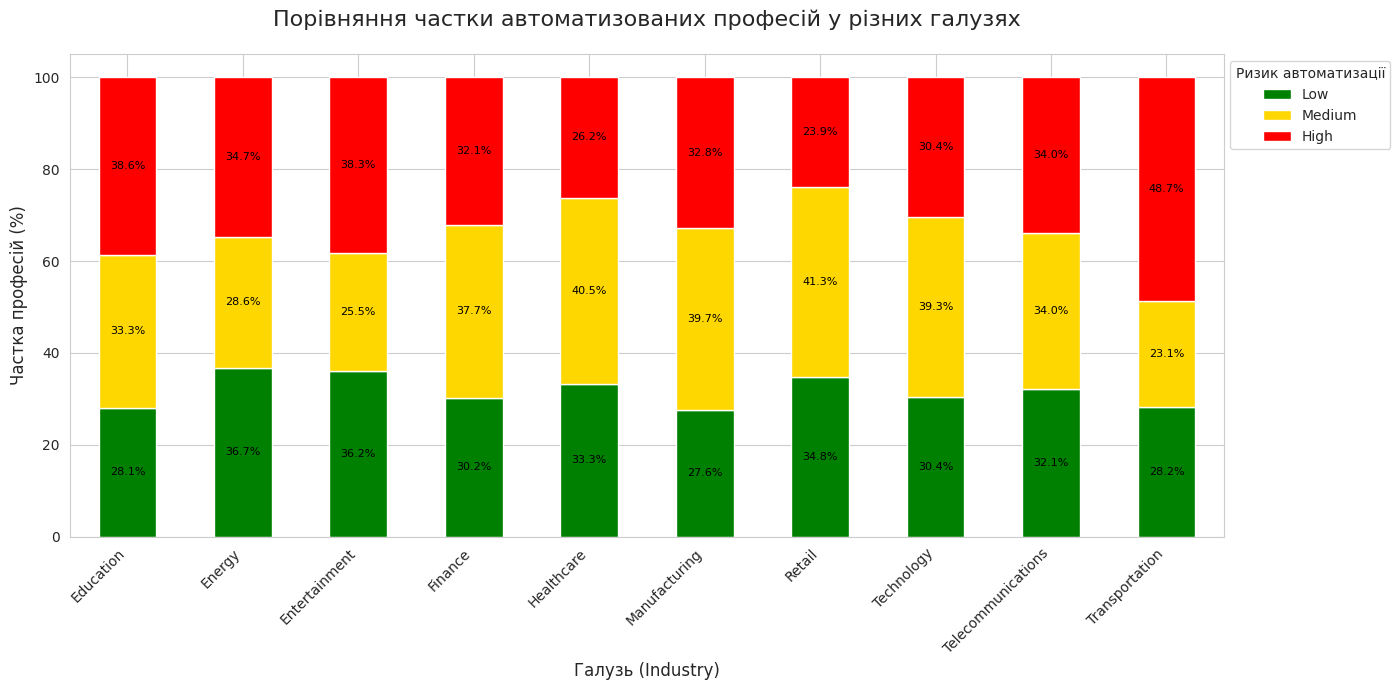

In [ ]:
df_market = pd.read_csv("ai_job_market_insights.csv")

risk_pivot = df_market.groupby(['Industry', 'Automation_Risk']).size().unstack(fill_value=0)
risk_pivot_percent = risk_pivot.div(risk_pivot.sum(axis=1), axis=0) * 100
risk_cols = ['Low', 'Medium', 'High']
risk_pivot_percent = risk_pivot_percent.reindex(columns=[col for col in risk_cols if col in risk_pivot_percent.columns], fill_value=0)

ax = risk_pivot_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    color={'Low': 'green', 'Medium': 'gold', 'High': 'red'}
)

plt.title('Порівняння частки автоматизованих професій у різних галузях', fontsize=16, pad=20)
plt.xlabel('Галузь (Industry)', fontsize=12)
plt.ylabel('Частка професій (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ризик автоматизації', loc='upper right', bbox_to_anchor=(1.15, 1))

for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

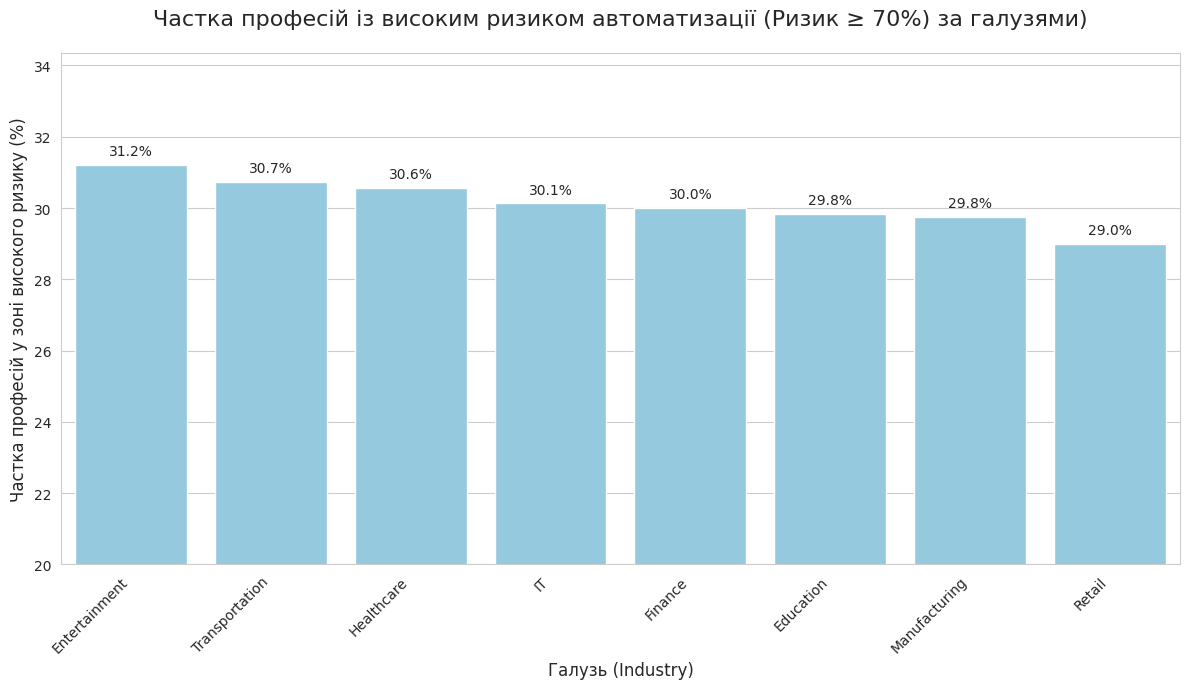

In [ ]:
HIGH_RISK_THRESHOLD = 70.0

if df_trends['Automation Risk (%)'].dtype == object:
    df_trends['Automation Risk (%)'] = (
        df_trends['Automation Risk (%)']
        .astype(str)
        .str.replace('%', '')
        .astype(float)
    )

df_trends['Is High Risk'] = (df_trends['Automation Risk (%)'] >= HIGH_RISK_THRESHOLD).astype(int)
risk_share_by_industry = df_trends.groupby('Industry')['Is High Risk'].mean() * 100

df_risk_share = risk_share_by_industry.reset_index().rename(columns={'Is High Risk': 'High Risk Job Share (%)'})
df_risk_share = df_risk_share.sort_values('High Risk Job Share (%)', ascending=False)

plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x='Industry',
    y='High Risk Job Share (%)',
    data=df_risk_share,
    color='skyblue'
)

MIN_Y_LIMIT = 20
MAX_Y_LIMIT = df_risk_share['High Risk Job Share (%)'].max() * 1.1

plt.ylim(MIN_Y_LIMIT, MAX_Y_LIMIT)

plt.title(f'Частка професій із високим ризиком автоматизації (Ризик ≥ {HIGH_RISK_THRESHOLD:.0f}%) за галузями)',
          fontsize=16, pad=20)
plt.xlabel('Галузь (Industry)', fontsize=12)
plt.ylabel('Частка професій у зоні високого ризику (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.1f}%',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center',
                     va='bottom',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=10)

plt.tight_layout()
plt.show()

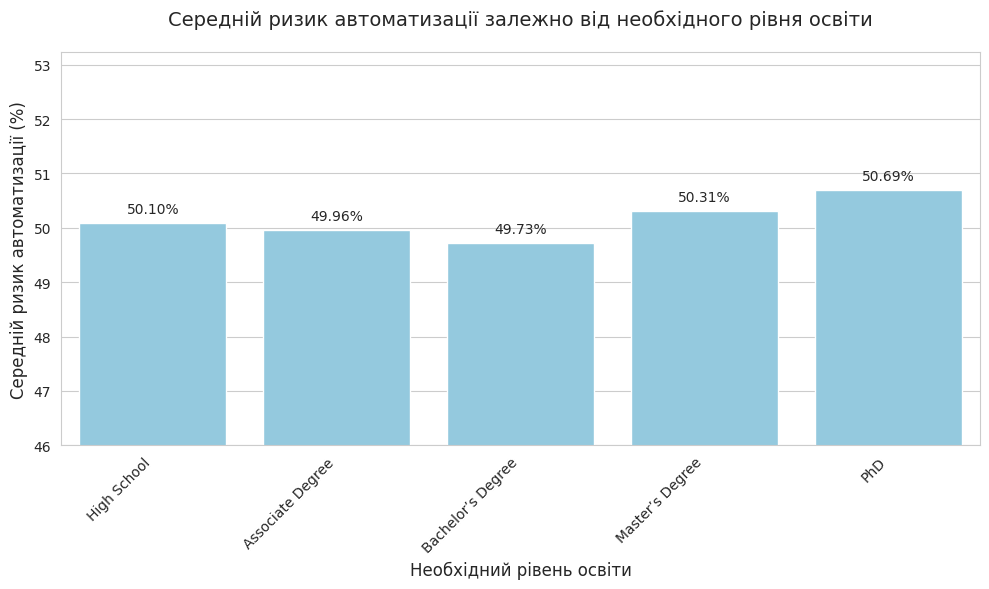

In [ ]:
if df_trends['Automation Risk (%)'].dtype == object:
    df_trends['Automation Risk (%)'] = (
        df_trends['Automation Risk (%)']
        .astype(str)
        .str.replace('%', '')
        .astype(float)
    )

education_order = [
    'High School',
    'Associate Degree',
    'Bachelor’s Degree',
    'Master’s Degree',
    'PhD'
]

education_risk = df_trends.groupby('Required Education')['Automation Risk (%)'].mean()
education_risk = education_risk.reindex(education_order).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Required Education',
    y='Automation Risk (%)',
    data=education_risk,
    color='skyblue'
)

plt.title('Середній ризик автоматизації залежно від необхідного рівня освіти',
          fontsize=14, pad=20)
plt.xlabel('Необхідний рівень освіти', fontsize=12)
plt.ylabel('Середній ризик автоматизації (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.ylim(46, education_risk['Automation Risk (%)'].max() * 1.05)
plt.tight_layout()
plt.show()